## Contents:
1. Import data
2. Address PPI data
3. Assign regions based on user state
4. Compare spending habits base on region
5. Create a new dataframe consisting of only 'High activity users'
6. Create flag based off of age
7. Create flag based off of income
8. Assign a dietary flag based off of goods purchased
9. Assign a family flag based off of number of dependants
10. Create visualizations to show distribution of profiles
11. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
12. Compare your customer profiles with regions and departments
13. Export visualizations

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Define path

In [2]:
path = r'C:\Users\Andrew\Desktop\Data Immersion 1\Instacart Basket Analysis'

## Import data

In [3]:
complete_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'complete_data.pkl'))

## Assign regions

In [4]:
complete_data.loc[complete_data['State'].isin(['Maine', 'New Hampsihre', 'Vermont', 'Massachusetts', 'Rhode Island'
                                            , 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Region'] = 'Northeast'

In [5]:
complete_data.loc[complete_data['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 
                                             'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 
                                              'Region'] = 'Midwest'

In [6]:
complete_data.loc[complete_data['State'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
                                             'North Carolina', 'South Carolina', 'Georgia', 'Florida', 
                                             'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 
                                             'Arkansas', 'Louisiana']), 'Region'] = 'South'

In [7]:
complete_data.loc[complete_data['State'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona',
                                             'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 
                                             'Hawaii']), 'Region'] = 'West'

## Compare spending habits by region using cross

In [8]:
region_spending_cross = pd.crosstab(complete_data['Region'], complete_data['spending'], dropna = False)

In [9]:
region_spending_cross

spending,High spender,Low spender
Region,,
Midwest,156154,7441171
Northeast,95664,5011694
South,210017,10581868
West,160478,8132435


In [10]:
# Copy to clipboard

In [11]:
region_spending_cross.to_clipboard()

## Create low activity exclusion flag

In [12]:
complete_data.loc[complete_data['max_order'] < 5, 'Activity'] = 'Low activity'

In [13]:
complete_data.loc[complete_data['max_order'] >= 5, 'Activity'] = 'High activity'

In [14]:
# Check that flag was added

## Creat new data frame with only high activity customers

In [15]:
Active_users = complete_data.loc[complete_data['Activity'] == 'High activity']

In [16]:
Active_users.head()

,user_id,Gender,State,Age,date_joined,Dependants,Marital status,income,order_id,order_number,...,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending,frequency,Region,Activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,9.0,Mid-range product,Busiest day,Average orders,8,New customer,Low spender,regular customer,Midwest,High activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,9.0,Mid-range product,Regularly busy,Average orders,8,New customer,Low spender,regular customer,Midwest,High activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,9.0,Mid-range product,Busiest day,Average orders,8,New customer,Low spender,regular customer,Midwest,High activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,12.6,Mid-range product,Regularly busy,Average orders,8,New customer,Low spender,regular customer,Midwest,High activity
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,12.6,Mid-range product,Least busy,Average orders,8,New customer,Low spender,regular customer,Midwest,High activity


In [17]:
# Export active users

In [18]:
Active_users.to_pickle(os.path.join(path, '02 Data', 'prepared data', 'active_users'))

## Create flag based on age

In [19]:
# Use loc function to asign a flag based of age and assign it to a new column 'Age_group'
Active_users.loc[(Active_users['Age'] < 30), 'Age_group'] = 'Young adult' 

C:\Users\Andrew\AppData\Local\Temp\ipykernel_4184\1971766171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Active_users.loc[(Active_users['Age'] < 30), 'Age_group'] = 'Young adult'


In [20]:
Active_users.loc[(Active_users['Age'] >= 30) & (Active_users['Age'] < 65), 'Age_group'] = 'Middle aged adult' 

In [21]:
Active_users.loc[(Active_users['Age'] >= 65), 'Age_group'] = 'Elderly' 

## Create flag based on income

In [22]:
# Use loc function to assign a flage based on income and assign it to a new column 'Income class'
Active_users.loc[(Active_users['income'] < 52000), 'Income class'] = 'Low income' 

C:\Users\Andrew\AppData\Local\Temp\ipykernel_4184\2599812916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Active_users.loc[(Active_users['income'] < 52000), 'Income class'] = 'Low income'


In [23]:
Active_users.loc[(Active_users['income'] >= 52000) & (Active_users['income'] < 156000), 'Income class'] = 'Middle income' 

In [24]:
Active_users.loc[(Active_users['income'] >= 156000), 'Income class'] = 'High income' 

In [25]:
# Adjust max columns to see the ones we have added
pd.set_option('display.max_columns', None)

## Assign dietary flag based on buying habits of users

In [26]:
# use department_id to look at dietary habits of users by creating crosstable
diet_crosstab = pd.crosstab(Active_users['department_id'], Active_users['user_id'], dropna = False)

In [27]:
diet_crosstab.to_clipboard()

In [28]:
diet_dict = dict()
for user in diet_crosstab:
    workinglist = diet_crosstab[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:
        diet_dict[user] = 'Vegan'
    elif workinglist[11] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'No restrictions'

In [29]:
diet_flag = []
for user in Active_users['user_id']:
    diet_flag.append(diet_dict[user])

In [30]:
Active_users['diet_type'] = diet_flag

C:\Users\Andrew\AppData\Local\Temp\ipykernel_4184\3561027605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Active_users['diet_type'] = diet_flag


## Assign family flag based on number of dependants

In [31]:
Active_users.loc[(Active_users['Dependants'] > 0), 'Household status'] = 'Family' 

C:\Users\Andrew\AppData\Local\Temp\ipykernel_4184\2979121673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Active_users.loc[(Active_users['Dependants'] > 0), 'Household status'] = 'Family'


In [32]:
Active_users.loc[(Active_users['Dependants'] == 0), 'Household status'] = 'Single' 

In [33]:
# Crosstable showing order hour of the day and based on household status
household_order_crosstab = pd.crosstab(Active_users['order_hour_of_day'], Active_users['Household status'], dropna = False)

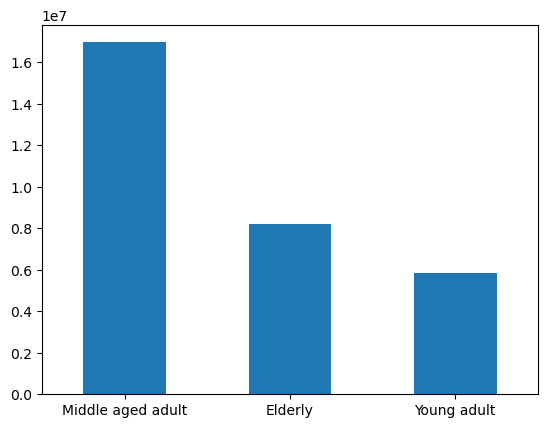

In [34]:
# Create simple visualizations to show the distribution of profiles
age_profile_bar = Active_users['Age_group'].value_counts().plot.bar(rot=0)

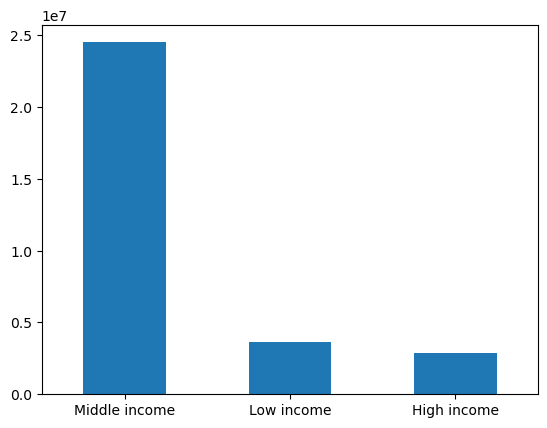

In [35]:
income_profile_bar = Active_users['Income class'].value_counts().plot.bar(rot=0)

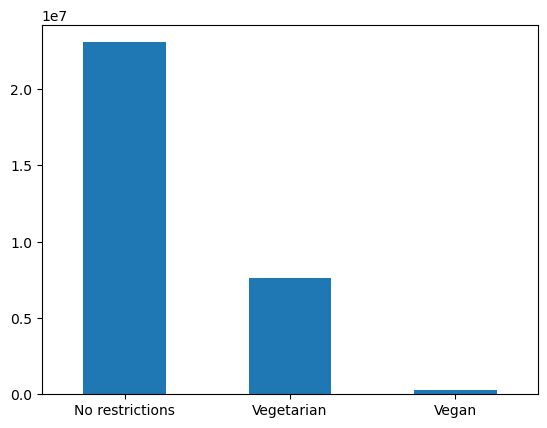

In [36]:
diet_profile_bar = Active_users['diet_type'].value_counts().plot.bar(rot=0)

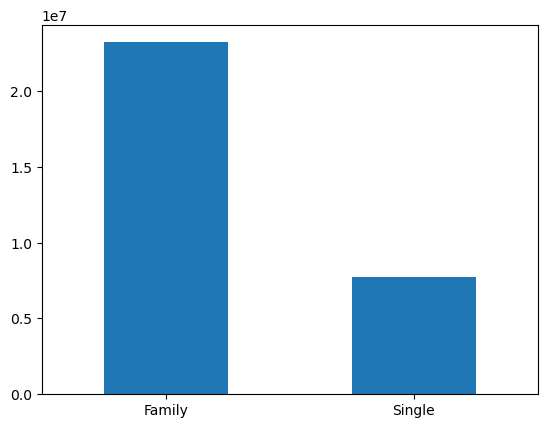

In [37]:
family_profile_bar = Active_users['Household status'].value_counts().plot.bar(rot=0)

In [38]:
# Aggregate the same variables on a customer-profile level for usage frequency and expenditure
Active_users.groupby('Age_group').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                    mean   max  min       mean      max  min
Age_group                                                                   
Elderly                        10.587760  30.0  0.0  11.757768  99999.0  1.0
Middle aged adult              10.612913  30.0  0.0  11.927488  99999.0  1.0
Young adult                    10.610878  30.0  0.0  12.198693  99999.0  1.0

#### We can not see much varience in order frequency, but we do se a lead in mean prices for those that fall in the "YA" category

In [39]:
Active_users.groupby('Income class').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                mean   max  min       mean      max  min
Income class                                                            
High income                10.473451  30.0  0.0  38.753004  99999.0  1.0
Low income                 10.922367  30.0  0.0   6.751992     25.0  1.0
Middle income              10.574291  30.0  0.0   9.590207  99999.0  1.0

#### The big trend of note here is the massive difference in expenditure between those in the 'High income' category and those in the others. We can see a strong correlation between the amount of money a user makes and spends on average.

In [40]:
Active_users.groupby('diet_type').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                  mean   max  min       mean      max  min
diet_type                                                                 
No restrictions              10.384334  30.0  0.0  11.995948  99999.0  1.0
Vegan                        13.221932  30.0  0.0   6.957126     20.0  1.0
Vegetarian                   11.172321  30.0  0.0  11.947061  99999.0  1.0

#### As could be expected we see the prices of the 'No restrictions' diet have the highest average while the most strict diet 'Vegan' has the least, we do have to take into account that these prices arent adjusted for JUST food products which is something to keep  in mind. We can also see the trend stays the same for the frequency of orders. 

In [41]:
Active_users.groupby('Household status').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                   mean   max  min       mean      max  min
Household status                                                           
Family                        10.611587  30.0  0.0  11.877157  99999.0  1.0
Single                        10.588728  30.0  0.0  12.102657  99999.0  1.0

#### The only variable of importance here is the mean which looks to be pretty similar between the two groups 

## Compare your customer profiles with regions and departments

In [42]:
loyalty_frequency_cross = pd.crosstab(complete_data['loyalty_flag'], complete_data['Activity'])

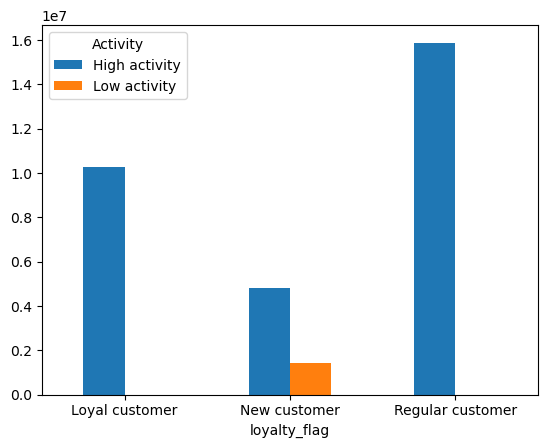

In [43]:
loyalty_frequency_bar = loyalty_frequency_cross.plot.bar(rot = 0)

In [44]:
loyalty_spending_cross = pd.crosstab(Active_users['spending'], Active_users['loyalty_flag'])

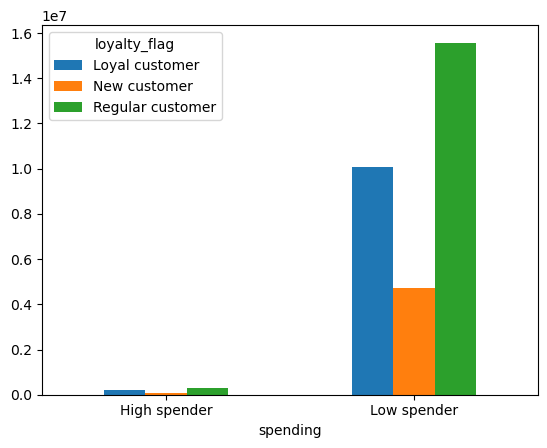

In [45]:
loyalty_spending_bar = loyalty_spending_cross.plot.bar(rot = 0)

In [46]:
region_frequency_cross = pd.crosstab(Active_users['Region'], Active_users['frequency'])

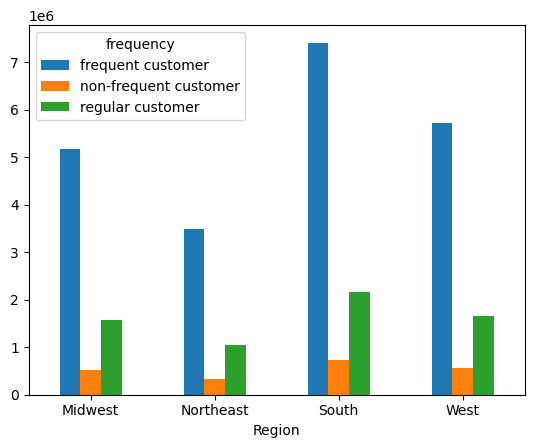

In [47]:
region_frequency_bar = region_frequency_cross.plot.bar(rot = 0)

In [48]:
region_spending_cross = pd.crosstab(Active_users['Region'], Active_users['spending'])

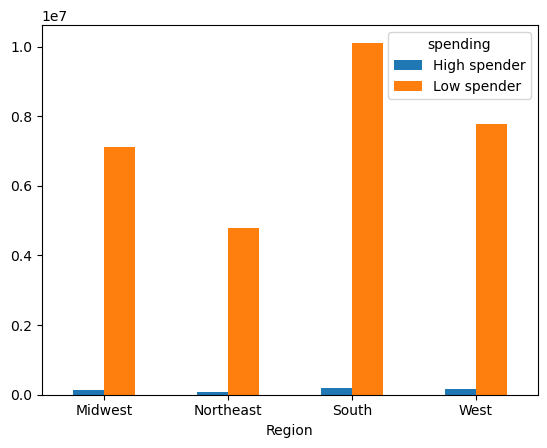

In [49]:
region_spending_bar = region_spending_cross.plot.bar(rot = 0)

In [50]:
region_activity_cross = pd.crosstab(Active_users['Region'], Active_users['Activity'])

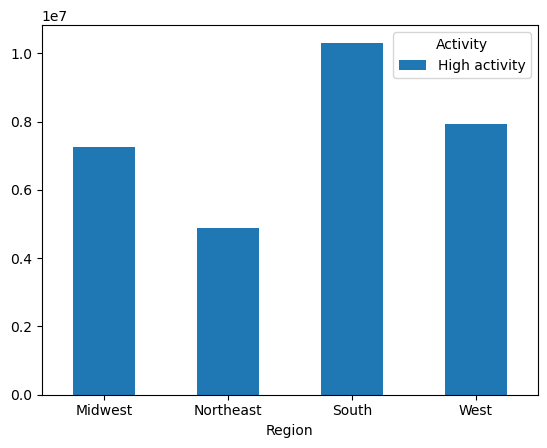

In [51]:
region_activity_bar = region_activity_cross.plot.bar(rot = 0)

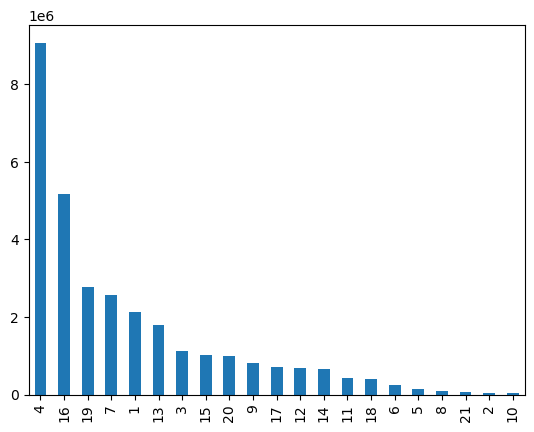

In [52]:
department = Active_users['department_id'].value_counts().plot.bar()

In [53]:
family = Active_users['household_status'].value_counts().plot.bar()

KeyError: 'household_status'

## Export visualizations

In [54]:
age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

In [55]:
income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

In [56]:
diet_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_profile_bar.png'))

In [57]:
family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_bar.png'))

In [58]:
loyalty_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_frequency_bar.png'))

In [59]:
loyalty_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_spending_bar.png'))

In [60]:
region_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_frequency_bar.png'))

In [61]:
region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_bar.png'))

In [62]:
region_activity_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_activity_bar.png'))

In [63]:
department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_orders_bar.png'))

In [64]:
family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_demo.png'))

NameError: name 'family' is not defined

In [ ]:
# Crosstables made
    
#    region/spending
#    diet
#    household/orders
#    loyalty/frequency
#    loyalty/spending
#    region/frequency
#    region/activity
    

In [65]:
# Visualizations made

#    household/orders
#    loyalty/frequency
#    loyalty/spending
#    region/frequency
#    region/activity
#    region/spending

In [66]:
# make column names uniform

In [67]:
Active_users.head()

,user_id,Gender,State,Age,date_joined,Dependants,Marital status,income,order_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending,frequency,Region,Activity,Age_group,Income class,diet_type,Household status
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Busiest day,Average orders,8,New customer,Low spender,regular customer,Midwest,High activity,Middle aged adult,High income,Vegetarian,Family
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,8,New customer,Low spender,regular customer,Midwest,High activity,Middle aged adult,High income,Vegetarian,Family
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Busiest day,Average orders,8,New customer,Low spender,regular customer,Midwest,High activity,Middle aged adult,High income,Vegetarian,Family
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Average orders,8,New customer,Low spender,regular customer,Midwest,High activity,Middle aged adult,High income,Vegetarian,Family
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Least busy,Average orders,8,New customer,Low spender,regular customer,Midwest,High activity,Middle aged adult,High income,Vegetarian,Family
